[3.3 3.3 3.3 3.3 3.3 3.3]
2521
Sample mean= 1300.113600
Standard Deviation= 848.120643
Fraction of PE's with no electron signal =0.252100
0.0373


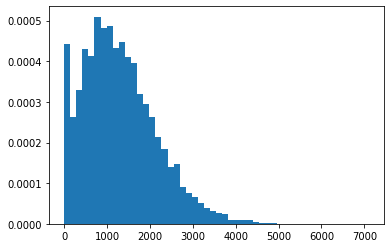

In [13]:
# SImultating the electron production in a Photomultiplier tube with Monte carlo. 

import numpy as np
import matplotlib.pyplot as plt


#np.random.seed(np.random.randint(1,10000,1))
np.random.seed(42)



#init
N = 6
M = 10000
n_out_arr= np.zeros(M)


nu = np.zeros(N)
#nu[0] = 6.
for i in range(0,N):
    nu[i] = 3.3

print(nu)
c=0 
for i in range(0, M):
    n_in = 1
    #print("n_in=%f" %n_in)
    for j in range(0,N):
        n_out =0
        #print("n_out=%f" %n_out)
        for k in range(0, n_in):
            n=np.random.poisson(nu[j])
            #print("n=%f" %n)
            n_out = n_out + n
            #print("n_out=%f" %n_out)
            #print("------")
        n_out_arr[i] = n_out
        if n_out ==0:
            c+=1
        n_in = n_out
        #print("n_in=%f" %n_in)
        #print("-----")
    #print("-----")

                
print(c)           

num_bins = 50
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(n_out_arr, num_bins, density=True)

samp_mean = 1/M * np.sum(n_out_arr)
print("Sample mean= %f" %samp_mean)
s=0
for i in range(0,M):
    s += np.sum((n_out_arr[i] - samp_mean)**2)
    

# meanout = np.sum(n_out_arr) / M
# meanoutsq = np.sum(n_out_arr*n_out_arr) / M
# nout_sd = np.sqrt(M/(M-1) * (meanoutsq-meanout*meanout))

# print('meanout=%f, meanoutsq=%f, nout_sd=%f, ' %(meannout, meanoutsq, nout_sd))
print("Standard Deviation= %f" %np.sqrt((1/(M-1))*s))
print("Fraction of PE's with no electron signal =%f" %(c/M))


a=0
for i in range(0,M):
    z = np.random.poisson(3.3)
    if z ==0:
        a+=1
        
print(a/M)

In [135]:
eg_arr = np.zeros(5)
for i in range (0,5):
    eg_arr[i] = i
print(eg_arr)
mu = np.mean(eg_arr)
s=0
for i in range(0,5):
    s += (eg_arr[i] - mu)**2

print(s)
print(mu)
print((1/(4))*s)

[0. 1. 2. 3. 4.]
10.0
2.0
2.5


The sampel mean can be calculated from 
$$ \bar{n_{out}} = \frac{1}{M}\sum_{i=1}^M n_{out,i} $$
The sample variance is calculated from 
$$ V = \frac{1}{M-1} \sum_{i=1}^M (n_{out,i} - \bar{n_{out}})^2 $$
Comparing $V$ to the equation in the problem sheet. Compare the sample STD to the value that one would obtain from a poisson distribuuted variable with mean $\nu_{out}$


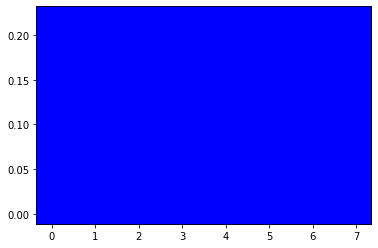

In [15]:

from scipy.stats import poisson

fig, ax = plt.subplots(1, 1)
mu = 3.3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk') 
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=1000, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)